In [3]:
# Importing Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_35788\3845507596.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
# Generate Data
def Datagenerate(m):

    X = np.random.randn(m)*10
    noise = np.random.randn(m)*5
    y = 3*X + 1 + noise
    return X,y


X,y = Datagenerate(500)





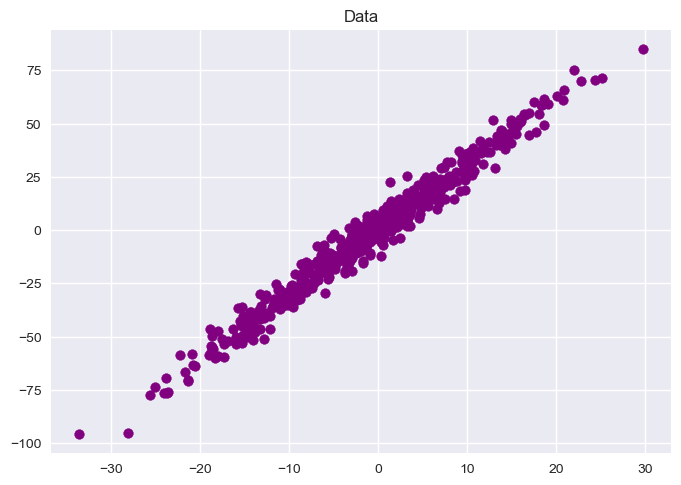

In [5]:
# Making a function for plotting the graph

def Plotgraph(X , y , color = "purple" , title = "Data"):
    plt.title(title)
    plt.scatter(X,y , c = color)
    plt.show()
    
Plotgraph(X,y)

In [6]:
#Feature Scaling

def Featurescaling(X):
    """This is mainly used when we are dealing with multiple features as when there are different features that take on very different ranges of values, It can cause Gradient Descent work slow.So we do re scaling of different features so they take Comparable values. """
    
    X = (X - X.mean())/X.std()
    
    return X

X = Featurescaling(X)


In [7]:
# separating the Test and Train Data 

def Testtrain(X , y , split = 0.7):
    m = X.shape[0]
    
    data = np.zeros((m , 2))
    data[:,0] = X
    data[:,1] = y
    
    np.random.shuffle(data)
    
    split = int(m*split)
    
    Xtrain = data[:split,0]
    ytrain = data[:split,1]
    
    Xtest = data[split: , 0]
    ytest = data[split: , 1]
    
    return Xtrain , ytrain , Xtest , ytest


In [8]:
Xtrain , ytrain , Xtest , ytest = Testtrain(X , y)

In [9]:
print(Xtest)

[ 0.1009696   0.81091841  1.05171508  1.46678995 -0.19341269 -1.00268192
  0.20403311  0.18856369 -1.21114753  0.21328099 -0.56723642 -1.26428153
 -2.4464386   0.65275574 -0.55095182  0.29632772 -0.60999407  0.13663434
  1.6392333   0.47176499 -0.30495586  0.31500092  1.1364318   0.54840338
  0.62581543 -0.31139411  2.09211382 -0.78471409 -0.79824341 -0.26490495
  1.54037929 -0.71028925  0.3744485   0.43203923 -0.32341689  0.7758946
 -0.48001501 -1.45935871 -0.31267013 -0.22215708  1.0582596  -0.12747039
 -1.19768135 -1.46534443 -1.1686776  -1.01613687  0.37489867  0.12587745
 -0.22069713  1.2546834   1.39391214 -0.0256928  -0.29593394  0.30746365
  1.67581808  0.62942661  0.77800472  0.3207909   1.77109672  1.25680476
 -0.11650722 -1.77501726  0.25080541 -0.29318671  0.17135523  1.46471635
 -0.9077474   1.01755777 -1.10485019 -0.224846    1.91917413 -0.76105585
  0.75611993 -1.78820421  0.40153098 -0.53672802  0.46016856 -0.27608569
 -0.96150146  1.14550631  0.46086891 -0.82823275 -1.

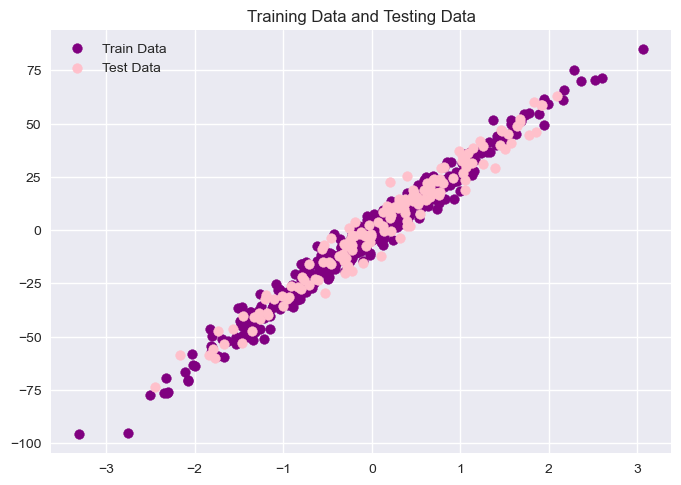

In [10]:
plt.title("Training Data and Testing Data")
plt.scatter(Xtrain , ytrain , color = "purple" , label = "Train Data")

plt.scatter(Xtest , ytest , color = "pink" , label = "Test Data")
plt.legend()
plt.show()

In [11]:
# Hypothesis

def hypothesis(X, theta):
    return theta[0] + theta[1]*X

# Cost Function
def error(X , y , theta):
    m = X.shape[0]
    e = 0
    for i in range(m) :
        y_i = hypothesis(X[i] , theta)
        e = e + (y[i] - y_i)**2
        
    return e/(2*m)

# This is the Derivative Function
def gradient(X,y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        exp = hypothesis(X[i] , theta) - y[i]
        grad[0] = exp
        grad[1] = exp*X[i]
        
        return grad/m
    
    
def train(X , y ,  alpha = 1):
    
    theta = np.zeros((2,))
    
    max_iterations = 550
    error_list = []
    for i in range(max_iterations):
        grad = gradient(X,y,theta)
        error_list.append(error(X ,y, theta))
        theta[0] = theta[0] - alpha*grad[0]
        theta[1] = theta[1] - alpha*grad[1]
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.plot(error_list)
        
    return theta

def predict(X , theta):
    return hypothesis(X , theta)
    

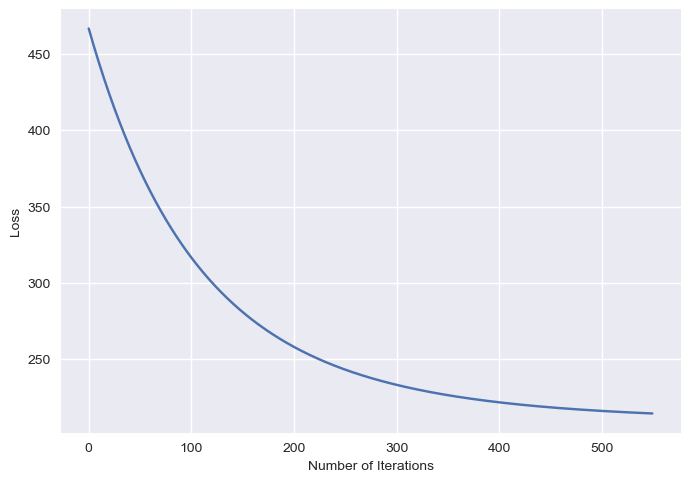

In [12]:
train1 = train(X,y)

In [281]:
train1

array([16.3598323 , 22.17248607])

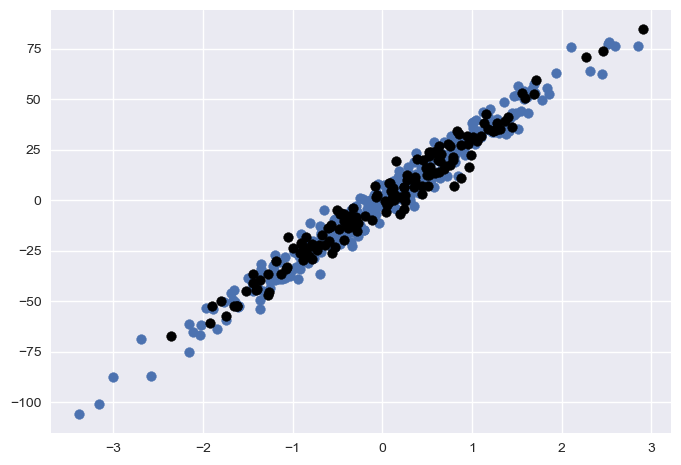

In [282]:
plt.scatter(Xtrain , ytrain)
plt.scatter(Xtest , ytest , color = "black")
plt.show()

In [283]:
y_predict = predict(Xtest , train1)

print(y_predict)


[ 40.63434068 -11.8510978   80.7598346   21.68478622 -25.64650181
  21.83183182 -19.54076255  47.33279051  24.06168139  14.67571806
  30.34028095   9.17382671  10.25955147 -14.76828262  28.64351467
   6.82191165  -1.71839741  10.10652555  44.58264959  -1.08008489
  33.13853524   9.04720108  44.45172422 -15.72280585  27.91479985
  -3.32028946 -13.83098335  -7.41805063  18.70060309 -20.3675661
  21.64651972  18.94974176   6.76408887  28.18727271   0.25995026
  39.29370382 -19.64696985  37.70097699  17.01766375   5.92201623
  20.81500507  39.75157302  -5.75402157 -11.91824583   5.67008322
  29.35092775  13.81491925  -6.9718963   22.55211605  21.60002549
  28.30722979  22.02152761  19.26665051  17.57325095  43.59600687
   4.60242573  10.10887615  34.83092155  26.24284592  -1.11893988
   3.67601081   9.93728705   6.8711485   18.34877753  37.60712328
  19.79125913  46.79077009   6.04759089  32.55102941  -3.64131132
  54.24850897  17.92419071  48.35212245   8.34734222   9.07275558
  42.436733

In [284]:
pd.DataFrame(y_predict)

,0
0,40.634341
1,-11.851098
2,80.759835
3,21.684786
4,-25.646502
...,...
145,3.306628
146,33.117088
147,43.801897
148,51.637030


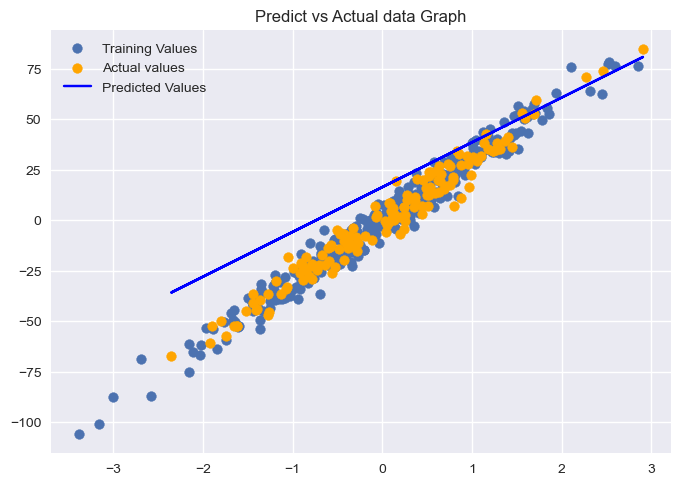

In [286]:
plt.title("Predict vs Actual data Graph")
plt.scatter(Xtrain , ytrain , label = "Training Values")
plt.scatter(Xtest , ytest , color = "orange" , label= "Actual values")
plt.plot(Xtest , y_predict , color = "blue" , label="Predicted Values")
plt.legend()


In [287]:
# Model Evaluation

def evaluate(y , y_predict):
    
    ymean = y.mean()
    num = np.sum((y - y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [289]:
evaluate(ytest , y_predict)

0.5907916164453324